In [61]:
import numpy as np
import pandas as pd
from pathlib import Path
import torch
from torch import nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
import os
import glob
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import datasets, linear_model, metrics

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
pd.set_option('display.max_colwidth', None)

np.random.seed(0)

In [62]:
data_dir = Path('./Data_Files')

In [63]:
# Params
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.1,
          'loss': 'ls'}

In [64]:
def convert(df: pd.DataFrame, frame_size=10):
    x = np.asarray(df.iloc[:, 1]).reshape(-1, frame_size)
#     x = x[x.shape[0]//10:-x.shape[0]//10]
    return x


def change(df4: pd.DataFrame):
    for index, row in df4.iterrows():
        if row['frequency'] != "airflow(m/s)":
            if float(row['frequency']) > 500:
                df4.drop(index, inplace=True)
    return df4

In [65]:
data_dir6 = Path("./new_files_july23/") 

df29 = pd.read_csv(data_dir6 / "desk.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df29 = df29[df29['frequency'] != "clocktime"]
df29 = df29.dropna()
df29 = change(df29)
df29 = convert(df29)

df30 = pd.read_csv(data_dir6 / "no_air.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df30 = df30[df30['frequency'] != "clocktime"]
df30 = df30.dropna()
df30 = change(df30)
df30 = convert(df30)

df31 = pd.read_csv(data_dir6 / "onvent.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df31 = df31[df31['frequency'] != "clocktime"]
df31 = df31.dropna()
df31 = change(df31)
df31 = convert(df31)

In [66]:
data_dir7 = Path("./final/") 

df32 = pd.read_csv(data_dir7 / "1m_v1.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df32 = df32[df32['frequency'] != "clocktime"]
df32 = df32.dropna()
df32 = change(df32)
df32 = convert(df32)

df33 = pd.read_csv(data_dir7 / "fan_66cm.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df33 = df33[df33['frequency'] != "clocktime"]
df33 = df33.dropna()
df33 = change(df33)
df33 = convert(df33)

df34 = pd.read_csv(data_dir7 / "50cm_v1.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df34 = df34[df34['frequency'] != "clocktime"]
df34 = df34.dropna()
df34 = change(df34)
df34 = convert(df34)
# df34 = df34[:129*198]

df35 = pd.read_csv(data_dir7 / "150cm_v1.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df35 = df35[df35['frequency'] != "clocktime"]
df35 = df35.dropna()
# df35 = df35[:211*129]
df35 = change(df35)
df35 = convert(df35)


data_dir8 = Path("./finale/") 
df36 = pd.read_csv(data_dir7 / "50cm_v1.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df36 = df36[df36['frequency'] != "clocktime"]
df36 = df36.dropna()
df36 = change(df36)
df36 = convert(df36)
# df36 = df36[:129*198]

df37 = pd.read_csv(data_dir7 / "1m_v1.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df37 = df37[df37['frequency'] != "clocktime"]
df37 = df37.dropna()
df37 = change(df37)
df37 = convert(df37)
# df37 = df37[:129*198]

In [67]:
df34

array([[6.70182937e+04, 2.80998738e+04, 8.76974000e+02, ...,
        3.92943400e+02, 2.66950000e+02, 3.01000000e+00],
       [1.44151110e+03, 9.55155400e+02, 1.37974300e+02, ...,
        6.09679000e+01, 3.00350000e+01, 3.15000000e+00],
       [9.76112600e+02, 6.68443100e+02, 1.72824300e+02, ...,
        5.02424000e+01, 1.75779000e+01, 3.59000000e+00],
       ...,
       [1.07246120e+03, 8.70115300e+02, 4.58536600e+02, ...,
        5.65764000e+01, 3.26326000e+01, 7.13000000e+00],
       [1.86571620e+03, 8.71248900e+02, 3.63561600e+02, ...,
        3.81551000e+01, 3.86097000e+01, 6.65000000e+00],
       [3.90487400e+02, 2.24437000e+02, 1.80475500e+02, ...,
        3.11271000e+01, 2.76080000e+01, 4.95000000e+00]])

In [68]:


df36[:129*210]

array([[6.70182937e+04, 2.80998738e+04, 8.76974000e+02, ...,
        3.92943400e+02, 2.66950000e+02, 3.01000000e+00],
       [1.44151110e+03, 9.55155400e+02, 1.37974300e+02, ...,
        6.09679000e+01, 3.00350000e+01, 3.15000000e+00],
       [9.76112600e+02, 6.68443100e+02, 1.72824300e+02, ...,
        5.02424000e+01, 1.75779000e+01, 3.59000000e+00],
       ...,
       [1.07246120e+03, 8.70115300e+02, 4.58536600e+02, ...,
        5.65764000e+01, 3.26326000e+01, 7.13000000e+00],
       [1.86571620e+03, 8.71248900e+02, 3.63561600e+02, ...,
        3.81551000e+01, 3.86097000e+01, 6.65000000e+00],
       [3.90487400e+02, 2.24437000e+02, 1.80475500e+02, ...,
        3.11271000e+01, 2.76080000e+01, 4.95000000e+00]])

In [69]:
data_dir9 = Path('./Aug12')

df38 = pd.read_csv(data_dir9 / "vent1_1.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df38 = df38[df38['frequency'] != "clocktime"]
df38 = df38.dropna()
df38 = convert(df38)
dftest1 = df38[-50:]
df38 = df38[-50:]


df39 = pd.read_csv(data_dir9 / "v1_50cm.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df39 = df39[df39['frequency'] != "clocktime"]
df39 = df39.dropna()
df39 = convert(df39)
dftest0_5 = df39[-50:]
df39 = df39[-50:]



df40 = pd.read_csv(data_dir9 / "v1_150cm.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df40 = df40[df40['frequency'] != "clocktime"]
df40 = df40.dropna()
df40 = convert(df40)
dftest1_5 = df40[-50:]
df40 = df40[-50:]


df41 = pd.read_csv(data_dir9 / "v1_2m.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df41 = df41[df41['frequency'] != "clocktime"]
df41 = df41.dropna()
df41 = convert(df41)
dftest2 = df41[-50:]
df41 = df41[-50:]

# df38 = pd.read_csv(data_dir9 / "vent1_1.txt", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
# df38 = df38[df38['frequency'] != "clocktime"]
# df38 = df38.dropna()
# df38 = convert(df38)

In [70]:
df38

array([[2.71776270e+03, 1.34252470e+03, 2.57803000e+01, 2.50884300e+02,
        3.97746900e+02, 3.89657700e+02, 2.46425600e+02, 3.44946100e+02,
        1.67860500e+02, 3.51000000e+00],
       [1.21280870e+03, 1.08976900e+03, 7.58275700e+02, 5.89041900e+02,
        3.46676100e+02, 1.45708100e+02, 1.36579600e+02, 2.50688000e+02,
        1.79288200e+02, 3.36000000e+00],
       [6.25123000e+01, 5.33787700e+02, 3.53852000e+02, 3.96688500e+02,
        1.31247030e+03, 1.39626080e+03, 1.26213050e+03, 5.44157900e+02,
        2.41137200e+02, 3.44000000e+00],
       [2.02074300e+03, 1.73466730e+03, 5.34155800e+02, 1.91450200e+02,
        2.55426000e+02, 2.37513100e+02, 1.08980700e+02, 1.46396400e+02,
        1.48579600e+02, 3.36000000e+00],
       [6.28403600e+02, 7.89575800e+02, 3.43337200e+02, 3.52657000e+01,
        2.18211700e+02, 1.02133600e+02, 3.09227200e+02, 4.45390400e+02,
        2.69119400e+02, 3.08000000e+00],
       [1.92478660e+03, 9.52920500e+02, 5.26529400e+02, 3.39215900e+02,
   

In [71]:
df39

array([[1.64025000e+01, 1.31792840e+03, 9.47746200e+02, 4.62074400e+02,
        1.90324800e+02, 2.44835100e+02, 2.52455600e+02, 1.97176400e+02,
        2.54019600e+02, 2.88000000e+00],
       [1.95798240e+03, 1.06438690e+03, 6.71041200e+02, 1.37870300e+02,
        1.88187700e+02, 8.29544000e+01, 2.94260000e+01, 5.61364000e+01,
        1.13475500e+02, 2.95000000e+00],
       [2.25963690e+03, 1.65139460e+03, 6.67611600e+02, 4.85600000e+02,
        4.75856300e+02, 1.41705800e+02, 3.24744000e+01, 1.62123000e+02,
        1.51395900e+02, 2.95000000e+00],
       [6.35862600e+02, 8.23191600e+02, 5.72030600e+02, 2.73619800e+02,
        2.54527100e+02, 7.17291000e+01, 1.67261900e+02, 4.54890000e+01,
        1.41110500e+02, 2.82000000e+00],
       [1.38248010e+03, 9.41324100e+02, 1.07059000e+02, 4.20339100e+02,
        2.10025800e+02, 2.18224900e+02, 1.22589500e+02, 9.93983000e+01,
        9.81461000e+01, 2.63000000e+00],
       [1.68516950e+03, 1.61426410e+03, 5.86413800e+02, 9.39650000e+01,
   

In [72]:
df40[:10*700]
df40

array([[2.98159400e+03, 1.33566070e+03, 1.64106800e+02, 1.17765800e+02,
        7.23149000e+01, 5.76419000e+01, 2.64437000e+01, 4.49085000e+01,
        6.07650000e+01, 3.22000000e+00],
       [8.70356400e+02, 9.84259100e+02, 3.36589100e+02, 1.64129800e+02,
        1.74373700e+02, 3.55744000e+01, 4.00890000e+01, 2.05655000e+01,
        3.11501000e+01, 3.44000000e+00],
       [3.51862210e+03, 1.89043910e+03, 2.58540500e+02, 4.20050000e+01,
        3.92813000e+01, 2.27569000e+01, 3.57028000e+01, 5.49191000e+01,
        3.36474000e+01, 3.36000000e+00],
       [4.17048700e+02, 4.02992400e+02, 2.64930700e+02, 8.72971000e+01,
        1.39396900e+02, 5.82617000e+01, 3.29276000e+01, 5.11813000e+01,
        5.98601000e+01, 3.51000000e+00],
       [1.21178962e+04, 5.89764050e+03, 7.82499500e+02, 3.35542400e+02,
        6.70801900e+02, 7.49512800e+02, 4.11427100e+02, 2.11647700e+02,
        5.30335800e+02, 3.44000000e+00],
       [5.72155500e+02, 1.09381300e+02, 3.10138500e+02, 1.16114100e+02,
   

In [73]:
df41[:10*33]
df41

array([[4.45889940e+03, 2.28189490e+03, 4.43853300e+02, 1.66539500e+02,
        5.17761000e+01, 5.02328000e+01, 1.74975000e+01, 1.29380000e+01,
        1.37518000e+01, 3.51000000e+00],
       [2.42253800e+02, 3.62224400e+02, 3.97411500e+02, 8.91755000e+01,
        9.22545000e+01, 5.76645000e+01, 6.81424000e+01, 4.58543000e+01,
        1.63713000e+01, 3.01000000e+00],
       [1.56895920e+03, 9.50588800e+02, 3.33902000e+02, 3.16638000e+01,
        6.95121000e+01, 6.78978000e+01, 4.38895000e+01, 1.42154000e+01,
        4.78515000e+01, 3.22000000e+00],
       [4.34051400e+02, 3.96192900e+02, 1.23840400e+02, 8.76102000e+01,
        5.35880000e+00, 6.36476000e+01, 4.21023000e+01, 5.50100000e+01,
        1.47431000e+01, 3.36000000e+00],
       [1.55707020e+03, 1.05021900e+03, 4.29757100e+02, 1.14032500e+02,
        1.04856500e+02, 4.19221000e+01, 1.87750000e+01, 2.82035000e+01,
        2.71415000e+01, 3.51000000e+00],
       [9.03346300e+02, 1.37831820e+03, 8.65939000e+02, 4.34187700e+02,
   

In [74]:
# df = df1.append([df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df16, df17, df18, df20, df22, df23, df24, df25, df26, df27, df28, df29, df30, df31, df32, df33])
# df = np.concatenate([df29, df30, df31, df32, df33, df34, df35, df36, df37])

# df = np.concatenate([df39, df38, df40, df41])

df = np.concatenate([df39, df38, df40, df41, df32, df34, df35, df36, df37, df29, df30, df31])

In [75]:
# df = df[df.columns[1:2]]


In [76]:
data = df


In [77]:
X = data[:,:-1]

X = X[:, :7]
X.shape

(1512, 7)

In [78]:
y = data[:, -1]
y.shape


(1512,)

In [79]:
print (X.shape, y.shape)

(1512, 7) (1512,)


In [80]:
print(max(y), min(y))
for i in range(len(y)):
    if i >= len(y):
        break
    if y[i]>35 or y[i]<1:
        print (i, y[i])
        X = np.delete(X, i, axis = 0)
        y = np.delete(y, i)
        

32.9 2.45


In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [82]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)


GradientBoostingRegressor(max_depth=4, min_samples_split=5, n_estimators=500)

In [83]:
from joblib import dump, load
dump(reg, "flowSense.joblib")

['flowSense.joblib']

In [84]:
y_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)

In [85]:
print(y_pred[:5])
print(y_test[:5])

[ 3.55200942  4.6365105  28.00781673  4.79157668  3.89350096]
[ 4.15  5.15 30.78  4.58  2.63]


In [86]:
print(y_train_pred[:5])
print(y_train[:5])

[5.39243371 5.02558049 4.17347567 6.88749083 7.30635641]
[5.35 5.25 4.23 7.26 7.64]


In [87]:
print("MSE of test: ", mean_squared_error(y_test, y_pred))
print(y_pred.shape)

print("Test Reg score: ", reg.score(X_test, y_test))
    

MSE of test:  4.1227415432580035
(303,)
Test Reg score:  0.950269499982947


In [88]:
print("MSE of training: ",  mean_squared_error(y_train, y_train_pred))

print("Train Reg score: ", reg.score(X_train, y_train))

MSE of training:  0.07412478971789853
Train Reg score:  0.9991599786683364


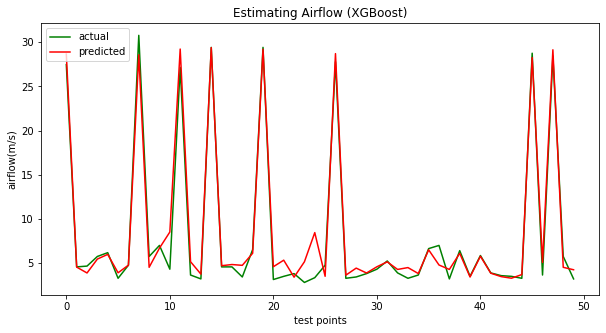

In [89]:
plt.figure(figsize=(10,5))
plt.plot(y_test[50:100], 'g', label="actual")
plt.plot(y_pred[50:100], 'r', label="predicted")
plt.legend()
plt.xlabel("test points")
plt.ylabel("airflow(m/s)")
plt.title("Estimating Airflow (XGBoost)")
plt.savefig("final.png")

Text(0.5, 1.0, 'Estimating Airflow (XGBoost)')

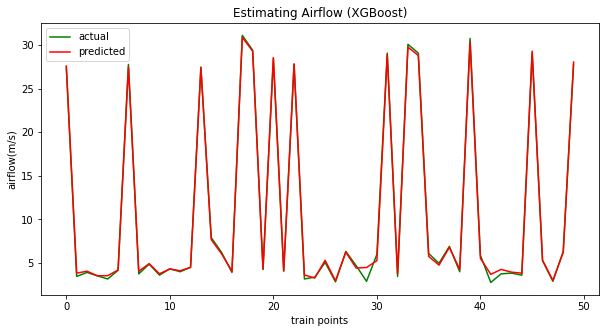

In [90]:
plt.figure(figsize=(10,5))
plt.plot(y_train[50:100], 'g', label="actual")
plt.plot(y_train_pred[50:100], 'r', label="predicted")
plt.legend()
plt.xlabel("train points")
plt.ylabel("airflow(m/s)")
plt.title("Estimating Airflow (XGBoost)")
# plt.savefig("1m_v1.jpg")

